<a href="https://colab.research.google.com/github/Steivann/tugas-data-mining/blob/main/Steivan_0706022210038_Week6_Adult_Income_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ini merupakan code code untuk mengimport library dari python
import pandas as pd #library pandas yang berfungsi untuk manipulasi dan analisis data
import numpy as np #numpy yang berfungsi untuk komputasi array dan operasi matematika.
import matplotlib.pyplot as plt #yang berfungsi untuk membuat visualisasi data dalam bentuk grafik.
import seaborn as sns #untuk visualisasi data yang lebih informatif, dibangun di atas Matplotlib.
from sklearn.preprocessing import LabelEncoder  #untuk mengubah data kategorikal menjadi numerik.
from sklearn.model_selection import train_test_split  #untuk membagi dataset menjadi bagian training dan testing.
from sklearn.tree import DecisionTreeClassifier  #untuk membuat model klasifikasi berbasis pohon keputusan.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # untuk mengimpor metrik evaluasi model, yaitu akurasi, matriks kebingungan, dan laporan klasifikasi.
from sklearn import tree  #tree, yang menyediakan fungsi tambahan untuk visualisasi pohon keputusan.
from sklearn.naive_bayes import GaussianNB  #untuk membuat model klasifikasi Naive Bayes khususnya untuk data kontinu.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Steivann/Dataset/refs/heads/main/adult-income.csv') #untuk membaca dan menyimpan url pada github dalam variabel df
df.head(10) #untuk memunculkan data dari isi dataset sebanyak 10
#Ini merupakan code  pembacaan data dari url dataset yang disimpan di github dan df head berarti menampilkan 10 datanya

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
df.describe()
# ini merupakan code untuk memberikan deskripsi atau ringkasan dari dataset

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info()
#Ini merupakan code yang memberikan ringkasan tentang struktur DataFrame. seperti informasi mengenai index, nama kolom dll

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isnull().sum()
#Ini merupakan sebuah code untuk menghitung jumblah nilai kosongdi setiap kolom dataframe.

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


<ipython-input-6-353938a1518c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='workclass', palette='viridis')


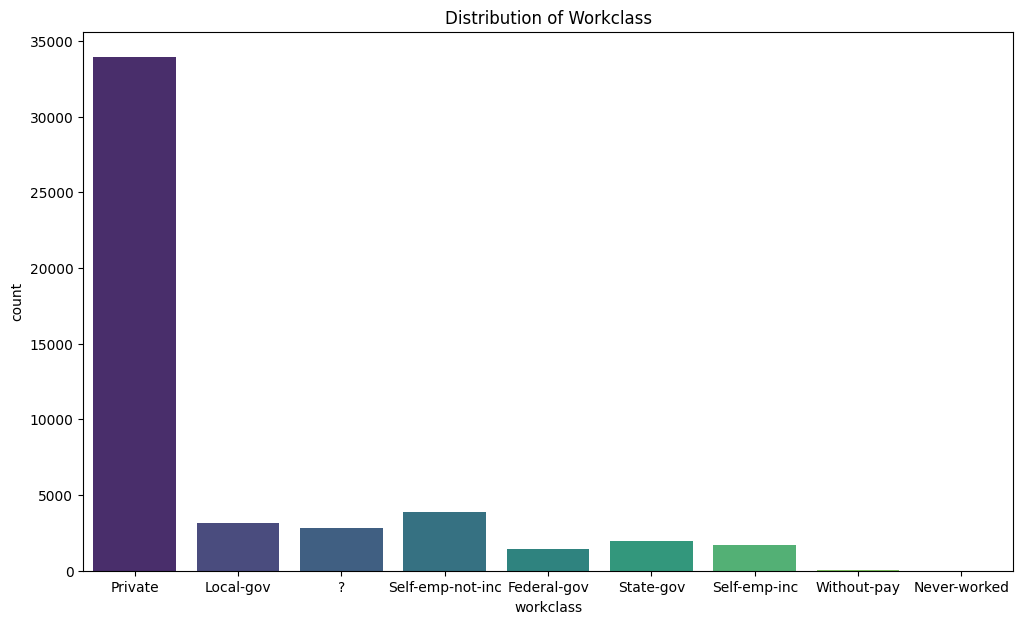

In [6]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='workclass', palette='viridis')
plt.title('Distribution of Workclass')
plt.show()

# Dengan plot ini kita dapat melihat persebaran tipe kelas pekerjaan dari orang orang

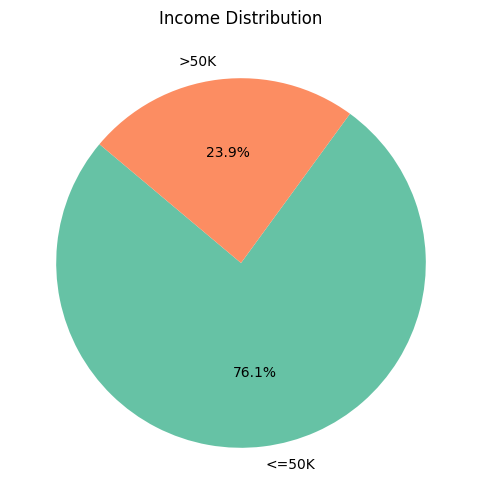

In [7]:
income_counts = df['income'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5','#fc8d62'])
plt.title('Income Distribution')
plt.show()

# Dengan menggunakan pie chart kita dapat melihat perbandingan berapa banyak orang yang memiliki income diatas 50K dan dibawah 50K

In [8]:
# untuk mengubah kolom kategorikal (workclass, education, dll) menjadi numerik
label_encoder = LabelEncoder()

# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# untuk menampilkan 10 data random
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
34562,37,4,454915,0,6,0,3,1,4,1,0,0,40,39,0
2553,27,4,122913,5,4,2,14,0,4,1,0,0,40,39,0
15277,34,4,149902,12,14,4,8,4,2,0,0,0,28,39,0
34684,45,4,36006,9,13,2,3,0,4,1,0,0,45,39,1
35240,47,4,201865,11,9,2,14,0,4,1,0,0,40,39,0
38457,22,4,137591,15,10,4,12,3,4,1,0,0,35,39,0
30072,52,6,217210,11,9,6,8,2,2,0,0,0,40,39,0
9314,26,4,209051,15,10,4,6,1,4,1,0,0,25,39,0
42555,40,6,548664,11,9,2,3,0,4,1,0,0,15,39,0
38774,59,4,131869,11,9,6,8,1,4,0,0,0,35,39,0


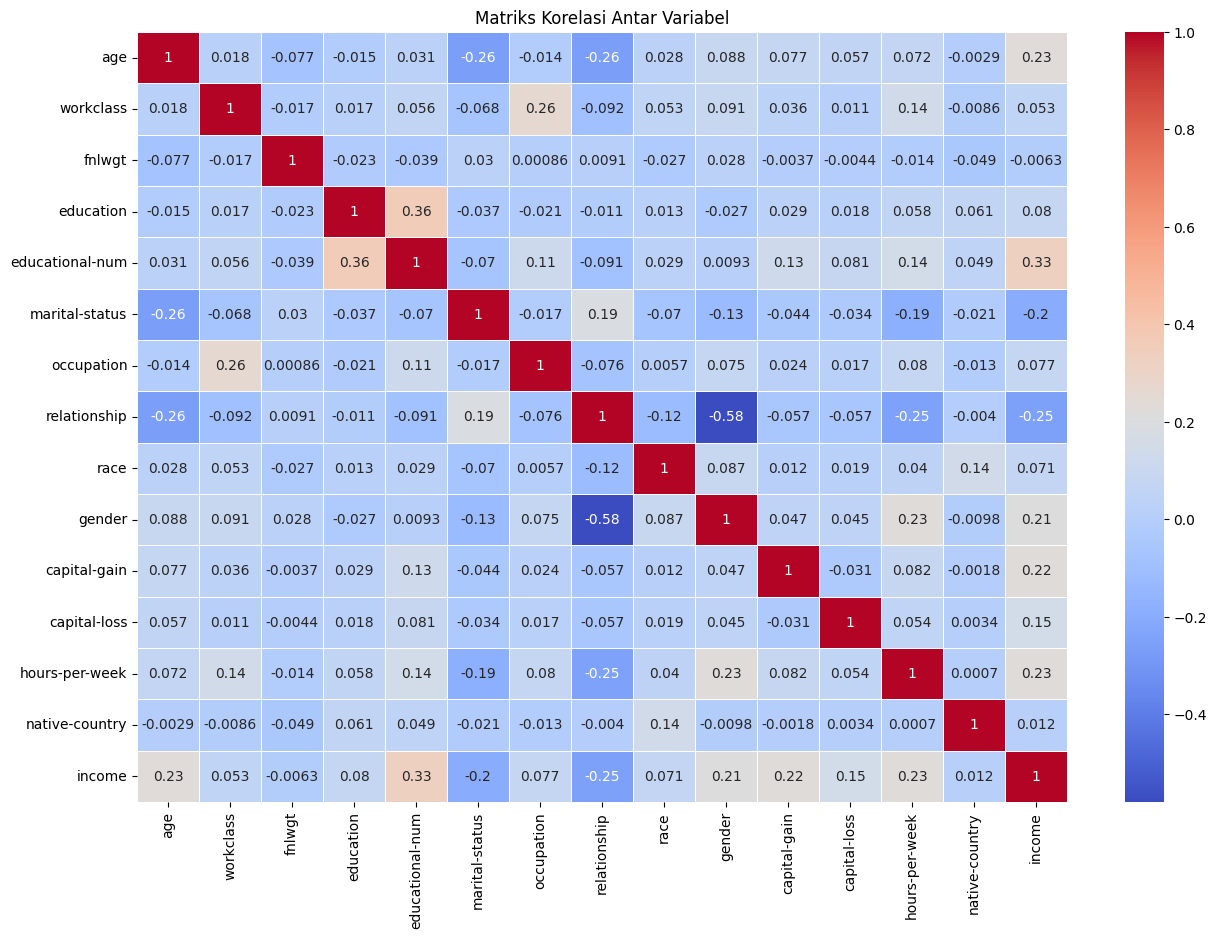

In [9]:

# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

#Warna menunjukkan arah dan kekuatan korelasi: merah menunjukkan korelasi positif dan biru menunjukkan korelasi negatif.
#Hubungan yang lebih gelap menunjukkan hubungan yang lebih kuat. Matriks ini membantu dalam menentukan variabel mana yang perlu dianalisis lebih lanjut.

**SPLIT DATA**

In [10]:
x = df.drop(['income'], axis=1)  # untuk menghapus kolom 'Outcome' dari DataFrame dan menyimpannya sebagai variabel x.
y = df['income']  # untuk enyimpan kolom 'Outcome' sebagai target variabel y.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # untuk membagi data menjadi data pelatihan (train) dan data pengujian (test)

#x dan y: Merupakan data fitur dan target yang akan dibagi.
#test_size=0.2: Menentukan bahwa 20% dari data akan digunakan sebagai data testing, sementara 80% sisanya akan menjadi data training.
#random_state=42: Mengatur seed untuk pengacakan data. Dengan menetapkan nilai ini, pembagian data akan konsisten setiap kali kode dijalankan.


In [12]:
x_train.shape, x_test.shape # untuk menampilkan bentuk jumlah baris dan kolom dari data (x_train) dan data uji (x_test). dan untuk memastikan bahwa data telah dibagi dengan benar dan untuk memahami ukuran masing-masing dataset.


((39073, 14), (9769, 14))

**DECISION TREE**

In [13]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0) #untuk membuat model Decision Tree dengan parameter tertentu
#criterion = 'entropy':  menentukan bagaimana model akan mengukur kualitas pemisahan data di setiap node pohon.
#max_depth = 3: Parameter ini membatasi kedalaman (jumlah level) pohon keputusan.
#random_state = 0: Parameter ini memastikan bahwa hasil pelatihan model akan konsisten setiap kali kode dijalankan.
clf_entropy.fit(x_train, y_train) # untuk melatih model menggunakan data pelatihan

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [14]:
y_pred_entropy = clf_entropy.predict(x_test) # untuk menggunakan model Decision Treeuntuk membuat prediksi pada data uji (x_test) dan menyimpan prediksi tersebut ke dalam variabel y_pred_entropy.

In [15]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entropy))) #untuk menampilkan akurasi model Decision Tree yang telah dibuat menggunakan kriteria 'entropy'

Model accuracy score with criterion entropy: 0.8449


In [16]:
print('Training set score: {0:0.4f}' .format(clf_entropy.score(x_train, y_train))) #untuk menampilkanskor (akurasi) model Decision Tree
print('Test set score: {0:0.4f}' .format(clf_entropy.score(x_test, y_test))) #untuk menampilkan skor (akurasi) model Decision Tree pada data uji.

Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [1994

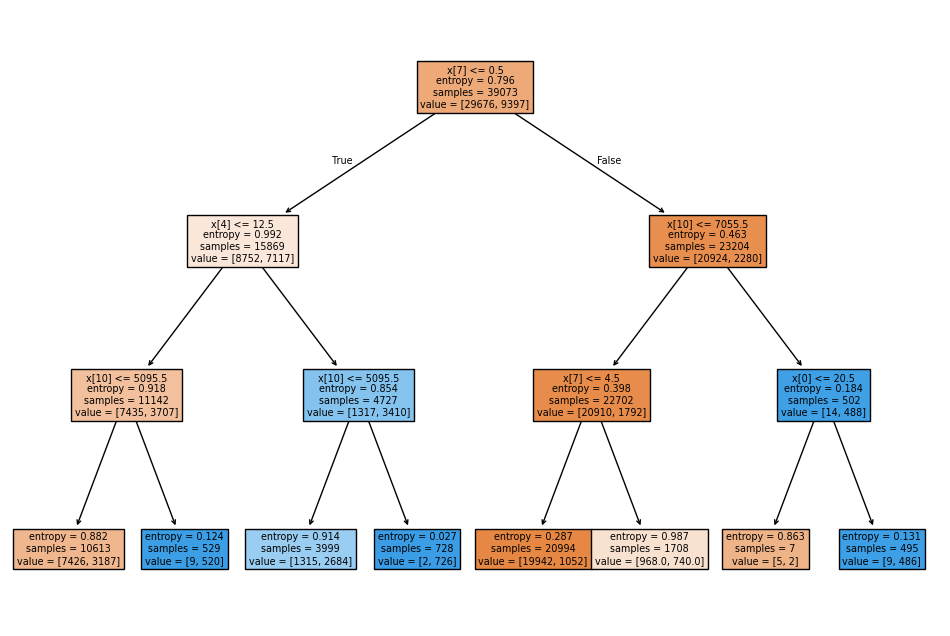

In [17]:
plt.figure(figsize = (12,8)) #untuk mengatur ukuran gambar menjadi lebar 12 inci dan tinggi 8 inci.
tree.plot_tree(clf_entropy.fit(x_train, y_train), filled = True) #untuk membuat visualisasi pohon keputusan dari model Decision Tree yang telah dilatih.

**CRITERION GINI INDEX**

In [18]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0) #untuk membuat DecisionTreeClassifier baru dan menyimpannya dalam variabel clf_gini
clf_gini.fit(x_train, y_train) #untuk melatih model Decision Tree menggunakan data pelatihan.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
y_pred_gini = clf_gini.predict(x_test) #menggunakan model Decision Tree clf_gini untuk memprediksi hasil berdasarkan data uji x_test, dan menyimpan prediksi tersebut dalam variabel y_pred_gini.

In [20]:
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #untuk menampilkan akurasi model Decision Tree yang telah dibuat menggunakan kriteria 'gini index'

Model accuracy score with criterion gini index: 0.8449


In [21]:
print('Training set score: {0:0.4f}' .format(clf_gini.score(x_train, y_train))) #untuk menampilkan akurasi model Decision Tree clf_gini pada data pelatihan (x_train, y_train).
print('Test set score: {0:0.4f}' .format(clf_gini.score(x_test, y_test))) #untuk menampilkan skor (akurasi) model Decision Tree pada data pelatihan dan data uji.

Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, '

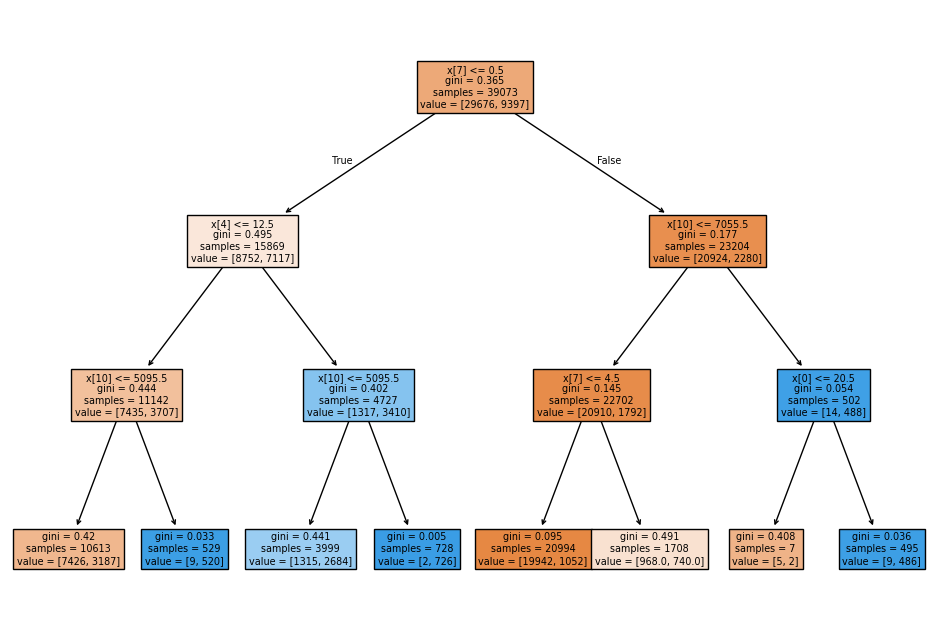

In [22]:
plt.figure(figsize = (12,8)) #Membuat figur (area plot) dengan ukuran 12x8 inci.
tree.plot_tree(clf_gini.fit(x_train, y_train), filled = True) #menampilkan visualisasi pohon keputusan

**CONFUSION MATRIX AND CLASSIFICATION REPORT OF CRITERION ENTROPY AND GINI INDEX**

In [23]:
entropi = confusion_matrix(y_test, y_pred_entropy) # untuk menghitung confusion matrix untuk model dengan kriteria 'entropy' dan menyimpannya di variabel entropi.
gini = confusion_matrix(y_test, y_pred_gini)# untuk menghitung confusion matrix untuk model dengan kriteria 'gini' dan menyimpannya di variabel gini.
print('Confusion matrix entropy: \n', entropi)# Menampilkan confusion matrix untuk model 'entropy'.
print('Confusion matrix gini index: \n', gini)# Menampilkan confusion matrix untuk model 'gini'.

Confusion matrix entropy: 
 [[7136  343]
 [1172 1118]]
Confusion matrix gini index: 
 [[7136  343]
 [1172 1118]]


In [24]:
print('Classification Report Entropy') # judul untuk laporan model 'entropy'.
print(classification_report(y_test, y_pred_entropy))# Menghitung dan menampilkan classification report untuk model 'entropy'.
print('Classification Report Gini Index')# judul untuk laporan model 'gini'.
print(classification_report(y_test, y_pred_gini))#Menghitung dan menampilkan classification report untuk model 'gini'.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



**NAIVE BAYES**

In [25]:
x_train = x_train.dropna() #untuk menghapus baris dengan nilai kosong (NaN) dari x_train.
y_train = y_train[x_train.index] # untuk memastikan y_train hanya berisi target yang sesuai dengan data x_train setelah penghapusan NaN.

nb_classifier = GaussianNB() # untuk membuat model Naive Bayes (GaussianNB).
nb_classifier.fit(x_train, y_train)# untuk melatih model Naive Bayes menggunakan data pelatihan yang telah dibersihkan.

GaussianNB()

In [26]:
nb_y_pred = nb_classifier.predict(x_test)#untuk menggunakan model Naive Bayes (nb_classifier) yang telah dilatih untuk membuat prediksi pada data uji (x_test) dan menyimpan hasilnya di variabel nb_y_pred.

In [27]:
print('Accuracy Score with GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))#Menampilkan akurasi model Naive Bayes pada data uji.

Gauss = confusion_matrix(y_test, nb_y_pred)# Menghitung dan menyimpan confusion matrix untuk model Naive Bayes.
print('Confusion matrix GaussianNB: \n', Gauss)#Menampilkan confusion matrix.

print('Training set score: {0:0.4f}' .format(nb_classifier.score(x_train, y_train)))#Menampilkan skor (akurasi) model pada data pelatihan.
print('Test set score: {0:0.4f}' .format(nb_classifier.score(x_test, y_test)))#Menampilkan skor (akurasi) model pada data uji.


Accuracy Score with GaussianNB: 0.8
Confusion matrix GaussianNB: 
 [[7099  380]
 [1580  710]]
Training set score: 0.7936
Test set score: 0.7994


In [28]:
print('Classification Report GaussianNB') #Menampilkan judul untuk classification report.
print(classification_report(y_test, nb_y_pred)) #Menghitung dan menampilkan classification report untuk model Naive Bayes menggunakan target sebenarnya (y_test) dan prediksi model (nb_y_pred).
#Conclusion
#Naive Bayes memiliki akurasi keseluruhan yang mungkin sedikit lebih rendah dari logistic regression.


Classification Report GaussianNB
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



**LOGISTIC REGGRESION **

In [29]:
from sklearn.linear_model import LogisticRegression #Mengimpor kelas LogisticRegression dari library sklearn.
model = LogisticRegression(max_iter=1000) #Membuat objek model Logistic Regression dengan nama model dan menetapkan max_iter=1000
model.fit(x_train, y_train) #Melatih model Logistic Regression menggunakan data pelatihan x_train dan target y_train.



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [30]:
y_pred_log = model.predict(x_test) #untuk Membuat prediksi menggunakan model Logistic Regression (model) pada data uji (x_test) dan menyimpan hasilnya di y_pred_log.
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log}) # untuk membuat DataFrame Pandas bernama comparison_table yang berisi dua kolom: "y_test" (target sebenarnya) dan "y_pred" (prediksi model).
print(comparison_table.head()) #untuk Menampilkan 5 baris pertama dari comparison_table untuk melihat perbandingan antara target sebenarnya dan prediksi model.



       y_test  y_pred
7762        0       0
23881       0       0
30507       1       1
28911       0       0
19484       0       0


In [31]:

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log))) #untuk menampilkan seberapa akurat model Logistic Regression dalam memprediksi hasil


Accuracy Score: 0.8103


In [33]:
conf_matrix = confusion_matrix(y_test, y_pred_log) # untuk menghitung confusion matrix menggunakan target sebenarnya (y_test) dan prediksi model (y_pred), lalu menyimpannya di variabel conf_matrix.
print("Confusion Matrix:\n", conf_matrix) #untuk menampilkan confusion matrix ke konsol.


Confusion Matrix:
 [[7079  400]
 [1453  837]]


In [34]:
print(classification_report(y_test, y_pred_log)) #menampilkan classification report untuk mengevaluasi kinerja model Logistic Regression secara rinci
#conclusion
# logistic regression memiliki akurasi keseluruhan sebesar 0,81.

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7479
           1       0.68      0.37      0.47      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.66      0.68      9769
weighted avg       0.79      0.81      0.79      9769

